In [2]:
#Final Project

In [4]:
import pandas as pd 
import numpy as np

In [18]:
# Define file paths (Update these if filenames change)
Employee= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/Employee.csv")
PerformanceRating= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/PerformanceRating.csv")
RatingLevel= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/RatingLevel.csv")
SatisfiedLevel= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/SatisfiedLevel.csv")
EducationLevel= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/EducationLevel.csv")

In [20]:
#Searching for Null values
print(Employee.isnull().sum())
print(PerformanceRating.isnull().sum())
print(RatingLevel.isnull().sum())
print(SatisfiedLevel.isnull().sum())
print(EducationLevel.isnull().sum())

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64
PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance         

In [22]:
#Searching for duplicated values
print(Employee.duplicated().sum())
print(PerformanceRating.duplicated().sum())
print(RatingLevel.duplicated().sum())
print(SatisfiedLevel.duplicated().sum())
print(EducationLevel.duplicated().sum())

0
0
0
0
0


In [28]:
# Convert reviewdate to datetime
PerformanceRating['ReviewDate'] = pd.to_datetime(PerformanceRating['ReviewDate'], errors='coerce')

# Confirm the change
print(PerformanceRating.dtypes)

PerformanceID                              object
EmployeeID                                 object
ReviewDate                         datetime64[ns]
EnvironmentSatisfaction                     int64
JobSatisfaction                             int64
RelationshipSatisfaction                    int64
TrainingOpportunitiesWithinYear             int64
TrainingOpportunitiesTaken                  int64
WorkLifeBalance                             int64
SelfRating                                  int64
ManagerRating                               int64
dtype: object


In [ ]:
#Merging Primary tables
merged_df = pd.merge(Employee, PerformanceRating, on="EmployeeID")

#Merging secondary tables 
education_level = pd.DataFrame({
    "EducationLevelID": [1, 2, 3, 4, 5],
    "EducationLevel": ["No Formal Qualifications", "High School", "Bachelors", "Masters", "Doctorate"]
})
merged_df = pd.merge(merged_df, education_level, left_on="Education", right_on="EducationLevelID", how="left")

In [88]:
# Merge Employee with PerformanceRating (Primary tables)
merged_df = pd.merge(Employee, PerformanceRating, on='EmployeeID', how='left')

# Merge with Satisfaction Levels (EnvironmentSatisfaction)
merged_df = pd.merge(merged_df, SatisfiedLevel, left_on='EnvironmentSatisfaction', right_on='SatisfactionID', how='left')

# Merge with Rating Levels (ManagerRating)
merged_df = pd.merge( merged_df, RatingLevel, left_on='ManagerRating', right_on='RatingID', how='left')

# Merge with Education Levels (Education)
merged_df = pd.merge( merged_df, EducationLevel, left_on='Education', right_on='EducationLevelID', how='left')

# Drop duplicate key columns
merged_df.drop(columns=['SatisfactionID', 'RatingID', 'EducationLevelID'], inplace=True)

# Check merged dataset structure
print(merged_df.info())

# Save the cleaned and merged dataset
merged_df.to_csv("Cleaned_Data.csv", index=False)

#Download the cleansed Data
merged_df.to_csv ("/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.csv")
merged_df.to_excel("/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.xlsx", index=False)

print(f"✅ Cleaned dataset saved successfully to: {"/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.csv"}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6899 non-null   object        
 1   FirstName                        6899 non-null   object        
 2   LastName                         6899 non-null   object        
 3   Gender                           6899 non-null   object        
 4   Age                              6899 non-null   int64         
 5   BusinessTravel                   6899 non-null   object        
 6   Department                       6899 non-null   object        
 7   DistanceFromHome (KM)            6899 non-null   int64         
 8   State                            6899 non-null   object        
 9   Ethnicity                        6899 non-null   object        
 10  Education                        6899 non-null   int64      

In [92]:
# Check the structure of the dataset
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6899 non-null   object        
 1   FirstName                        6899 non-null   object        
 2   LastName                         6899 non-null   object        
 3   Gender                           6899 non-null   object        
 4   Age                              6899 non-null   int64         
 5   BusinessTravel                   6899 non-null   object        
 6   Department                       6899 non-null   object        
 7   DistanceFromHome (KM)            6899 non-null   int64         
 8   State                            6899 non-null   object        
 9   Ethnicity                        6899 non-null   object        
 10  Education                        6899 non-null   int64      

In [58]:
############################## Ending of Week 1: Build Data Model, Data Cleaning and Preprocessing

In [60]:
############################## Week 2: Analysis Questions Phase

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Load the cleaned dataset
cleaned_data_path = "/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.csv"
merged_df = pd.read_csv("/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.csv", index_col=0)
merged_df

EmployeeID FirstName     LastName      Gender  Age BusinessTravel  \
0     3012-1A41  Leonelle        Simco      Female   30    Some Travel   
1     3012-1A41  Leonelle        Simco      Female   30    Some Travel   
2     3012-1A41  Leonelle        Simco      Female   30    Some Travel   
3     3012-1A41  Leonelle        Simco      Female   30    Some Travel   
4     3012-1A41  Leonelle        Simco      Female   30    Some Travel   
...         ...       ...          ...         ...  ...            ...   
6894  467E-977A       Jud    Melanaphy        Male   20    Some Travel   
6895  6FB9-A624      Marc       Calver  Non-Binary   27    Some Travel   
6896  EBF4-5928   Rudolph  MacDearmont        Male   21    Some Travel   
6897  60E6-B1D9    Merill          Agg        Male   21    Some Travel   
6898  84D4-D4C3     Naoma      Hebbard      Female   20     No Travel    

      Department  DistanceFromHome (KM) State                  Ethnicity  ...  \
0          Sales                     27    IL                      White  ...   
1          Sales                     27    IL                      White  ...   
2          Sales                     27    IL                      White  ...   
3          Sales                     27    IL                      White  ...   
4          Sales                     27    IL                      White  ...   
...          ...                    ...   ...                        ...  ...   
6894  Technology                     28    CA  Black or African American  ...   
6895  Technology                      8    CA  Black or African American  ...   
6896       Sales                      4    CA  Black or African American  ...   
6897  Technology                      7    CA  Black or African American  ...   
6898  Technology                     28    CA  Black or African American  ...   

      JobSatisfaction RelationshipSatisfaction  \
0                 3.0                      2.0   
1                 4.0                      5.0   
2                 5.0                      4.0   
3                 3.0                      2.0   
4                 4.0                      2.0   
...               ...                      ...   
6894              NaN                      NaN   
6895              NaN                      NaN   
6896              NaN                      NaN   
6897              NaN                      NaN   
6898              NaN                      NaN   

     TrainingOpportunitiesWithinYear TrainingOpportunitiesTaken  \
0                                3.0                        0.0   
1                                3.0                        1.0   
2                                3.0                        0.0   
3                                3.0                        1.0   
4                                1.0                        0.0   
...                              ...                        ...   
6894                             NaN                        NaN   
6895                             NaN                        NaN   
6896                             NaN                        NaN   
6897                             NaN                        NaN   
6898                             NaN                        NaN   

      WorkLifeBalance  SelfRating ManagerRating  SatisfactionLevel  \
0                 4.0         3.0           3.0            Neutral   
1                 2.0         3.0           2.0         Satisfied    
2                 4.0         5.0           5.0     Very Satisfied   
3                 3.0         5.0           4.0  Very Dissatisfied   
4                 3.0         4.0           3.0            Neutral   
...               ...         ...           ...                ...   
6894              NaN         NaN           NaN                NaN   
6895              NaN         NaN           NaN                NaN   
6896              NaN         NaN           NaN                NaN   
6897              NaN         NaN    

In [62]:
# First Categoty
# Employee Demographics & Salary Analysis

In [108]:
# 1. What is the distribution of employees by education level, job role, and department?
print(merged_df['EducationLevel'].value_counts())
print(merged_df['JobRole'].value_counts())
print(merged_df['Department'].value_counts())

EducationLevel
Bachelors                   2706
Masters                     1738
High School                 1380
No Formal Qualifications     857
Doctorate                    218
Name: count, dtype: int64
JobRole
Sales Executive              1567
Data Scientist               1387
Software Engineer            1373
Machine Learning Engineer     582
Senior Software Engineer      512
Sales Representative          500
Engineering Manager           307
Analytics Manager             213
Recruiter                     152
Manager                       145
HR Executive                  119
HR Business Partner            25
HR Manager                     17
Name: count, dtype: int64
Department
Technology         4375
Sales              2211
Human Resources     313
Name: count, dtype: int64


             EducationLevel         Salary
0                Bachelors   115837.495565
1                 Doctorate  159004.123853
2              High School   103430.593478
3                  Masters   112655.575374
4  No Formal Qualifications   91527.551925


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_4325/652913737.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Salary', y='EducationLevel', data=avg_salary_by_edu, ci=None)


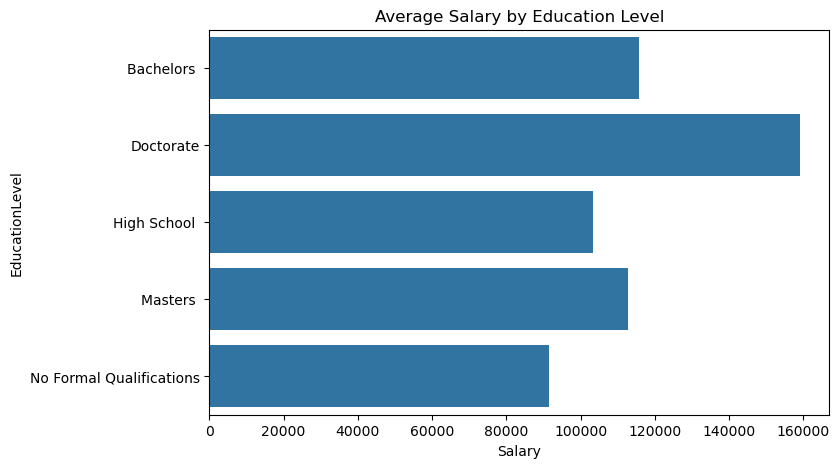

In [110]:
# 2. How does the average salary vary by education level?
avg_salary_by_edu = merged_df.groupby('EducationLevel')['Salary'].mean().reset_index()
print(avg_salary_by_edu)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Salary', y='EducationLevel', data=avg_salary_by_edu, ci=None)
plt.title("Average Salary by Education Level")
plt.show()

In [118]:
# 3. Is there a gender pay gap across different job roles and departments?
# Average salary by gender and job role
gender_pay_gap_role = merged_df.groupby(['JobRole', 'Gender'])['Salary'].mean().unstack()
print(gender_pay_gap_role)

# Average salary by gender and department
gender_pay_gap_dept = merged_df.groupby(['Department', 'Gender'])['Salary'].mean().unstack()
print(gender_pay_gap_dept)

Gender                            Female           Male     Non-Binary  \
JobRole                                                                  
Analytics Manager          325594.320000  371891.000000  380326.964286   
Data Scientist              59980.650930   54128.847430   57320.746988   
Engineering Manager        304307.005988  264288.170455  299074.861111   
HR Business Partner        380561.333333  269338.214286  368704.375000   
HR Executive               105316.666667  101253.703704   88782.600000   
HR Manager                 388146.875000  468185.444444            NaN   
Machine Learning Engineer  131421.113122  135853.776632  136147.783333   
Manager                    338444.400000  334529.888889  205622.000000   
Recruiter                   42849.294737   39304.245283            NaN   
Sales Executive            129693.145234  124496.896978  122851.230303   
Sales Representative        39085.226337   45161.021834   36812.928571   
Senior Software Engineer   136602.2605

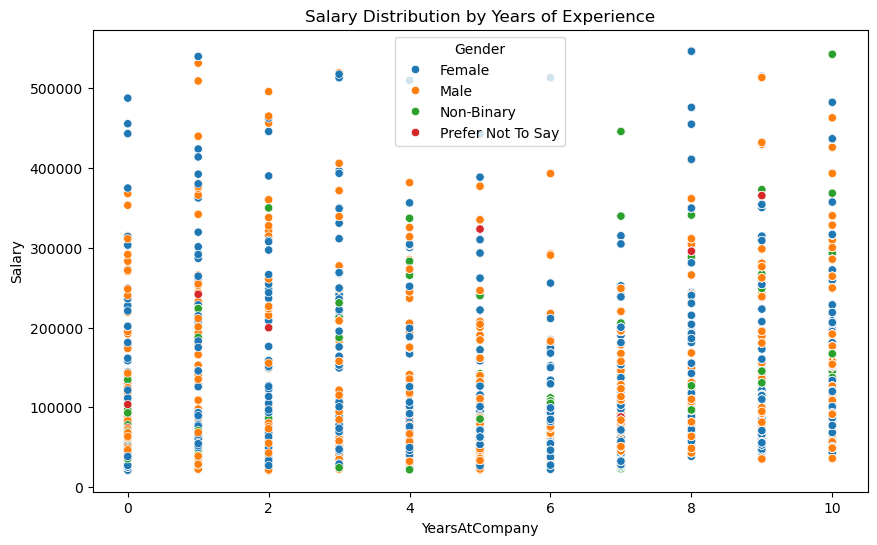

In [120]:
# 4. What is the salary distribution based on years of experience?
# Salary distribution by years at company
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='Salary', hue='Gender', data=df)
plt.title('Salary Distribution by Years of Experience')
plt.show()

In [122]:
# 5. Which departments have the highest and lowest average salaries?
salary_by_dept = df.groupby('Department')['Salary'].mean().reset_index()
print(salary_by_dept.sort_values('Salary', ascending=False))

        Department         Salary
1            Sales  120568.309815
0  Human Resources  107629.555911
2       Technology  106245.325486


In [124]:
# Second Categoty
# Employee Satisfaction & Engagement

                      JobRole  JobSatisfaction
0           Analytics Manager         3.418269
1              Data Scientist         3.457353
2         Engineering Manager         3.526490
3         HR Business Partner         3.347826
4                HR Executive         3.434783
5                  HR Manager         3.250000
6   Machine Learning Engineer         3.453405
7                     Manager         3.435714
8                   Recruiter         3.469799
9             Sales Executive         3.435897
10       Sales Representative         3.378323
11   Senior Software Engineer         3.356275
12          Software Engineer         3.413043


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_4325/42773236.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobSatisfaction', y='JobRole', data=avg_satisfaction_by_role, ci=None)


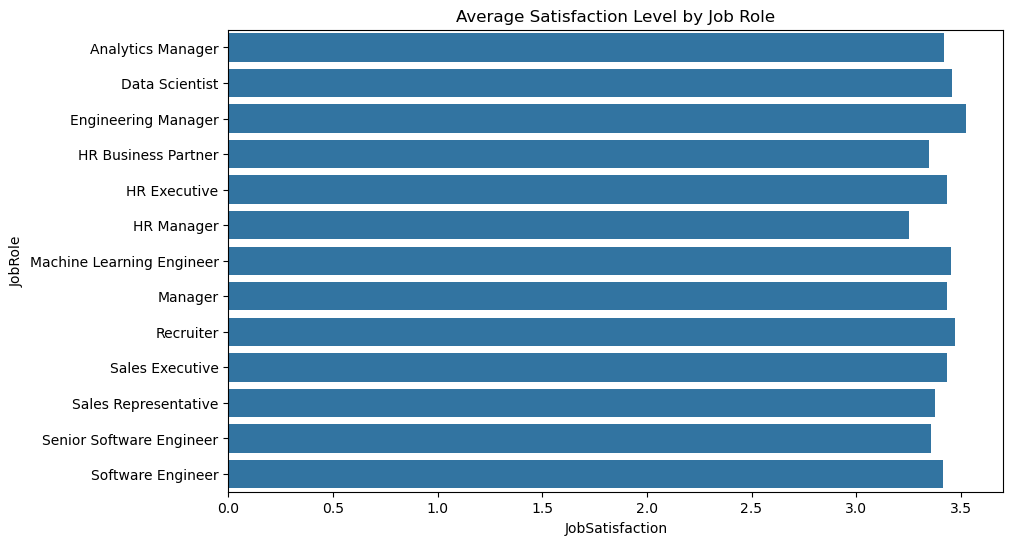

In [126]:
# 6. What is the average satisfaction level across different job roles?
# Average satisfaction by job role
avg_satisfaction_by_role = df.groupby('JobRole')['JobSatisfaction'].mean().reset_index()
print(avg_satisfaction_by_role)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='JobSatisfaction', y='JobRole', data=avg_satisfaction_by_role, ci=None)
plt.title("Average Satisfaction Level by Job Role")
plt.show()

Correlation between Salary and Job Satisfaction: 0.005305484974307222


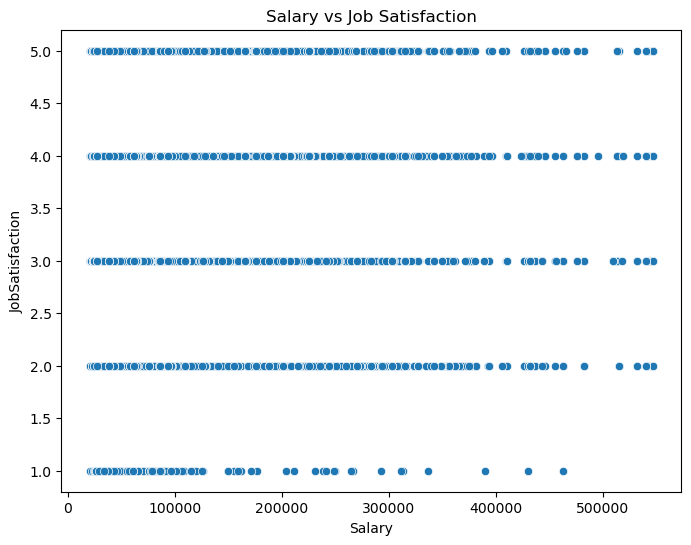

In [128]:
# 7. Is there a relationship between satisfaction level and salary?
corr_salary_satisfaction = df['Salary'].corr(df['JobSatisfaction'])
print(f"Correlation between Salary and Job Satisfaction: {corr_salary_satisfaction}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary', y='JobSatisfaction', data=df)
plt.title('Salary vs Job Satisfaction')
plt.show()

In [132]:
# 8. Do employees with higher education levels report higher satisfaction?
# Average satisfaction by education level
satisfaction_by_edu = df.groupby('EducationLevel')['JobSatisfaction'].mean().reset_index()
print(satisfaction_by_edu)

             EducationLevel  JobSatisfaction
0                Bachelors          3.440015
1                 Doctorate         3.298578
2              High School          3.460400
3                  Masters          3.435146
4  No Formal Qualifications         3.377381


In [136]:
# 9. Which departments have the most satisfied and least satisfied employees?
# Average satisfaction by department
satisfaction_by_dept = df.groupby('Department')['JobSatisfaction'].mean().reset_index()
print(satisfaction_by_dept.sort_values('JobSatisfaction', ascending=False))

        Department  JobSatisfaction
0  Human Resources         3.435644
2       Technology         3.434578
1            Sales         3.422057


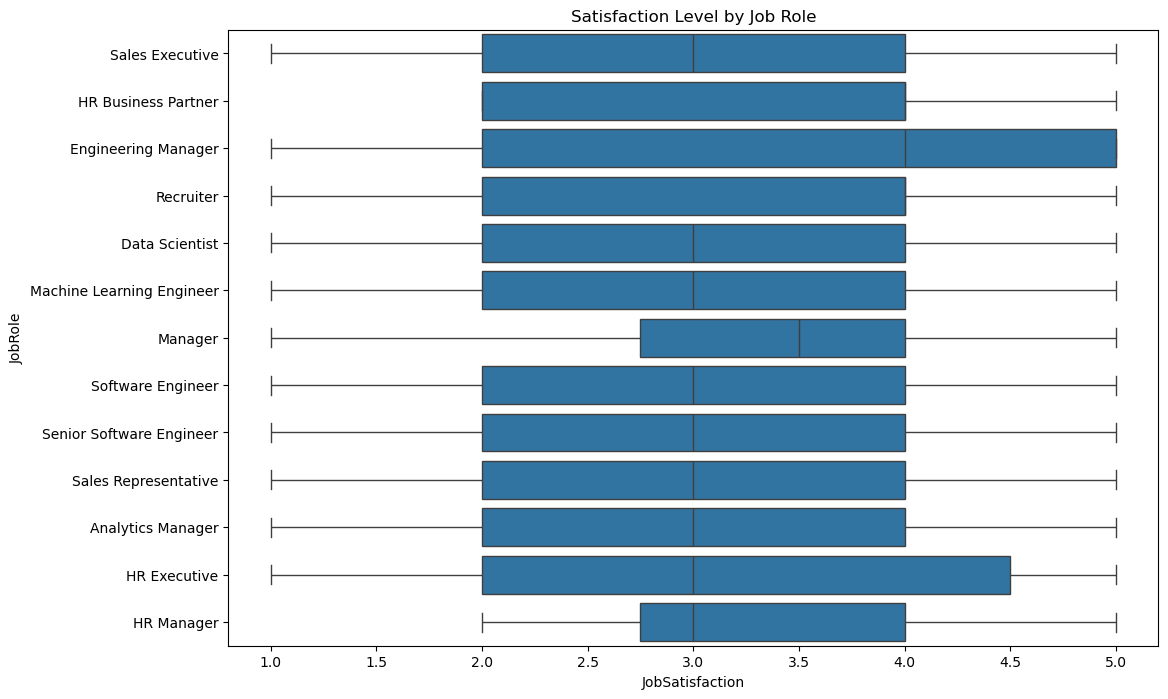

In [140]:
# 10. Does job role impact satisfaction level?
# Satisfaction level by job role
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobSatisfaction', y='JobRole', data=df)
plt.title('Satisfaction Level by Job Role')
plt.show()

In [142]:
# Third Categoty
# Attrition & Turnover Analysis

In [148]:
# 11. What is the overall employee attrition rate?
# Attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)

Attrition
No     67.227134
Yes    32.772866
Name: proportion, dtype: float64


In [150]:
# 12. Which department has the highest employee turnover?
# Attrition by department
attrition_by_dept = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
print(attrition_by_dept.sort_values('Attrition', ascending=False))

        Department  Attrition
1            Sales  39.755767
0  Human Resources  36.741214
2       Technology  28.960000


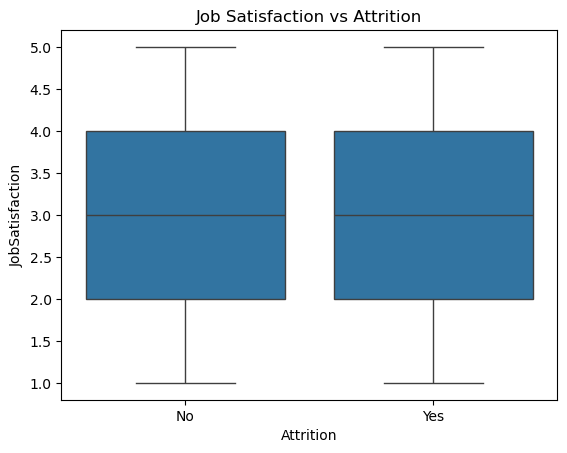

In [154]:
# 13. Is there a connection between satisfaction level and attrition? 
# Boxplot of job satisfaction vs attrition
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()

In [156]:
# 14. Do employees with higher education levels have lower attrition rates?
# Attrition rate by education level
attrition_by_edu = df.groupby('EducationLevel')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
print(attrition_by_edu.sort_values('Attrition'))

             EducationLevel  Attrition
1                 Doctorate  22.018349
2              High School   30.579710
3                  Masters   31.357883
4  No Formal Qualifications  34.655776
0                Bachelors   35.070214


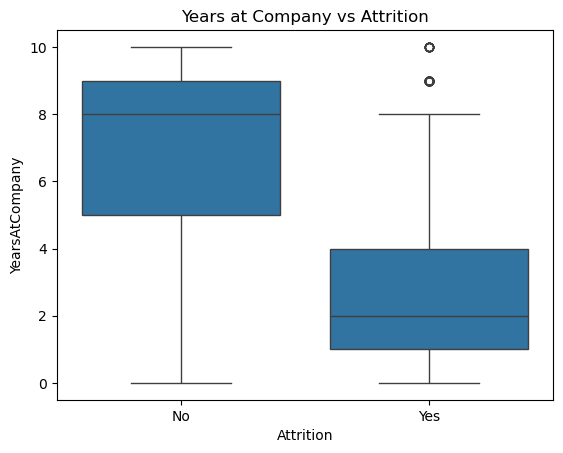

In [158]:
# 15. How does tenure (years at company) impact attrition?
# Years at company vs attrition
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company vs Attrition')
plt.show()

In [ ]:
# Fourth Categoty
# Promotion & Career Growth

In [160]:
# 16. How long does it take, on average, for employees to receive a promotion?
# Average time to promotion
avg_time_to_promotion = df['YearsSinceLastPromotion'].mean()
print(f"Average years to promotion: {avg_time_to_promotion}")

Average years to promotion: 4.14393390346427


In [162]:
# 17. Is there a correlation between education level and promotion frequency?
# Promotion rate by education level
promotion_by_edu = df.groupby('EducationLevel')['YearsSinceLastPromotion'].mean().reset_index()
print(promotion_by_edu)

             EducationLevel  YearsSinceLastPromotion
0                Bachelors                  4.033259
1                 Doctorate                 4.821101
2              High School                  4.659420
3                  Masters                  3.812428
4  No Formal Qualifications                 4.163361


In [166]:
# 18. Which departments promote employees the fastest and the slowest?
# Promotion rate by department
promotion_by_dept = df.groupby('Department')['YearsSinceLastPromotion'].mean().reset_index()
print(promotion_by_dept.sort_values('YearsSinceLastPromotion'))

        Department  YearsSinceLastPromotion
1            Sales                 3.843510
0  Human Resources                 3.996805
2       Technology                 4.306286


In [168]:
# 19. What percentage of satisfied employees receive promotions?
# Promotion rate for highly satisfied employees
satisfied_employees = df[df['JobSatisfaction'] > df['JobSatisfaction'].median()]
promotion_rate = (satisfied_employees['YearsSinceLastPromotion'] == 0).mean() * 100
print(f"Promotion rate for satisfied employees: {promotion_rate:.2f}%")

Promotion rate for satisfied employees: 18.04%


In [170]:
# 20. Does gender impact promotion opportunities?
# Promotion rate by gender
promotion_by_gender = df.groupby('Gender')['YearsSinceLastPromotion'].mean().reset_index()
print(promotion_by_gender)

              Gender  YearsSinceLastPromotion
0             Female                 4.297383
1               Male                 3.900589
2         Non-Binary                 4.533113
3  Prefer Not To Say                 4.484848


In [ ]:
# Save analysis results to Excel
output_path = "/Users/rahmasaadawy/Downloads/AnalysisQA.csv"
output_path = "/Users/rahmasaadawy/Downloads/AnalysisQA.xlsx"

with pd.ExcelWriter(output_path) as writer:
    avg_salary_by_edu.to_excel(writer, sheet_name="Salary by Education")
    salary_by_dept.to_excel(writer, sheet_name="Salary by Department")
    attrition_by_dept.to_excel(writer, sheet_name="Attrition by Department")
    promotion_by_dept.to_excel(writer, sheet_name="Promotion by Department")

print(f"HR analysis results saved to: {/Users/rahmasaadawy/Downloads/AnalysisQA.csv}")

In [172]:
# Save analysis results 

# Define file paths
excel_path = "/Users/rahmasaadawy/Downloads/AnalysisQA.xlsx"
csv_path = "/Users/rahmasaadawy/Downloads/AnalysisQA.csv"

# Save data to an Excel file with multiple sheets
with pd.ExcelWriter(excel_path) as writer:
    avg_salary_by_edu.to_excel(writer, sheet_name="Salary by Education", index=False)
    salary_by_dept.to_excel(writer, sheet_name="Salary by Department", index=False)
    attrition_by_dept.to_excel(writer, sheet_name="Attrition by Department", index=False)
    promotion_by_dept.to_excel(writer, sheet_name="Promotion by Department", index=False)

# Save data to separate CSV files (since CSV does not support multiple sheets)
avg_salary_by_edu.to_csv(csv_path.replace(".csv", "_SalaryByEducation.csv"), index=False)
salary_by_dept.to_csv(csv_path.replace(".csv", "_SalaryByDepartment.csv"), index=False)
attrition_by_dept.to_csv(csv_path.replace(".csv", "_AttritionByDepartment.csv"), index=False)
promotion_by_dept.to_csv(csv_path.replace(".csv", "_PromotionByDepartment.csv"), index=False)

# Print confirmation message
print(f"HR analysis results saved to: {excel_path} and multiple CSV files in the Downloads folder.")

HR analysis results saved to: /Users/rahmasaadawy/Downloads/AnalysisQA.xlsx and multiple CSV files in the Downloads folder.
